# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [1]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
import seaborn as sns
%matplotlib inline
import scipy.stats as stats

C:\ProgramData\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Step 2: Read in your data set 

In [2]:
#Read in data from source 
df_raw = pd.read_csv("C:\\DataScience\\admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [3]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

In [4]:
len(df_raw)

400

In [5]:
df_raw.isnull().sum()

admit       0
gre         2
gpa         2
prestige    1
dtype: int64

Answer:There 400 observations/rows. There are rows with null/missing values.  

#### Question 2. Create a summary table

In [6]:
df_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
admit,400.0,0.317500,0.466087,0.00,0.00,0.000,1.00,1.0
gre,398.0,588.040201,115.628513,220.00,520.00,580.000,660.00,800.0
gpa,398.0,3.390930,0.380630,2.26,3.13,3.395,3.67,4.0
prestige,399.0,2.486216,0.945333,1.00,2.00,2.000,3.00,4.0


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: GRE values are far more spread (min=220, max=800) than GPA values (min=2.26, max =4). For GRE the sum of quares of each diference in std formula is higher than for the GPA. 

#### Question 4. Drop data points with missing data


In [7]:
df_clean = df_raw.dropna()

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

In [8]:
df_raw.isnull().sum()

admit       0
gre         2
gpa         2
prestige    1
dtype: int64

In [9]:
df_clean.isnull().sum()

admit       0
gre         0
gpa         0
prestige    0
dtype: int64

Answer: No null values in df_clean. 

In [10]:
len(df_clean)

397

df_clean seems to have 397 observations. Let's drop the duplicates as well

In [11]:
df_clean=df_clean.drop_duplicates()

In [12]:
len(df_clean)

392

Now there are 392 valid observations

#### Question 6. Create box plots for GRE and GPA

{'boxes': [<matplotlib.lines.Line2D at 0xe3607f0>],
 'caps': [<matplotlib.lines.Line2D at 0xe360f28>,
 'fliers': [<matplotlib.lines.Line2D at 0xe376940>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xe3765f8>],
 'whiskers': [<matplotlib.lines.Line2D at 0xe360898>,
  <matplotlib.lines.Line2D at 0xe360be0>]}

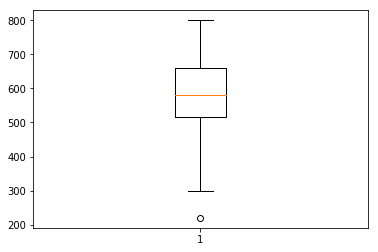

In [13]:
plt.boxplot(df_clean['gre'])

{'boxes': [<matplotlib.lines.Line2D at 0xe420048>],
 'caps': [<matplotlib.lines.Line2D at 0xe420780>,
 'fliers': [<matplotlib.lines.Line2D at 0xe42c198>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xe420e10>],
 'whiskers': [<matplotlib.lines.Line2D at 0xe4200f0>,
  <matplotlib.lines.Line2D at 0xe420438>]}

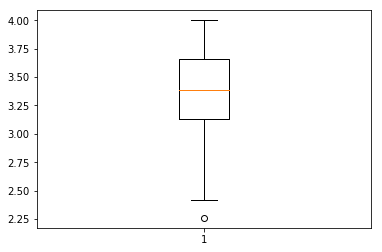

In [14]:
plt.boxplot(df_clean['gpa'])

#### Question 7. What do this plots show?

Answer: A box plot shows min, first quartile, median (read line), third quartile and max values.  Outliers below first quartile.  Most candidates have GRE between 500 and 700 and GPA between 3 and 3.75.

#### Question 8. Describe each distribution 

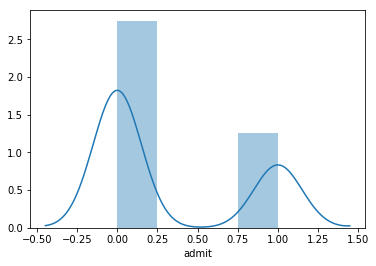

In [15]:
# plot the distribution of each variable 
sns.distplot(df_clean['admit'])


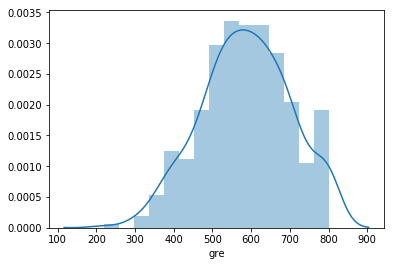

In [16]:
sns.distplot(df_clean['gre'])


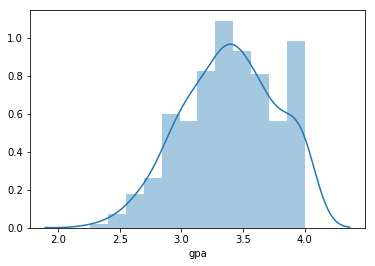

In [17]:
sns.distplot(df_clean['gpa'])


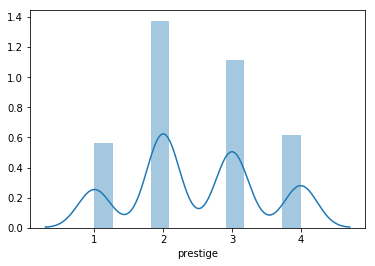

In [18]:
sns.distplot(df_clean['prestige'])

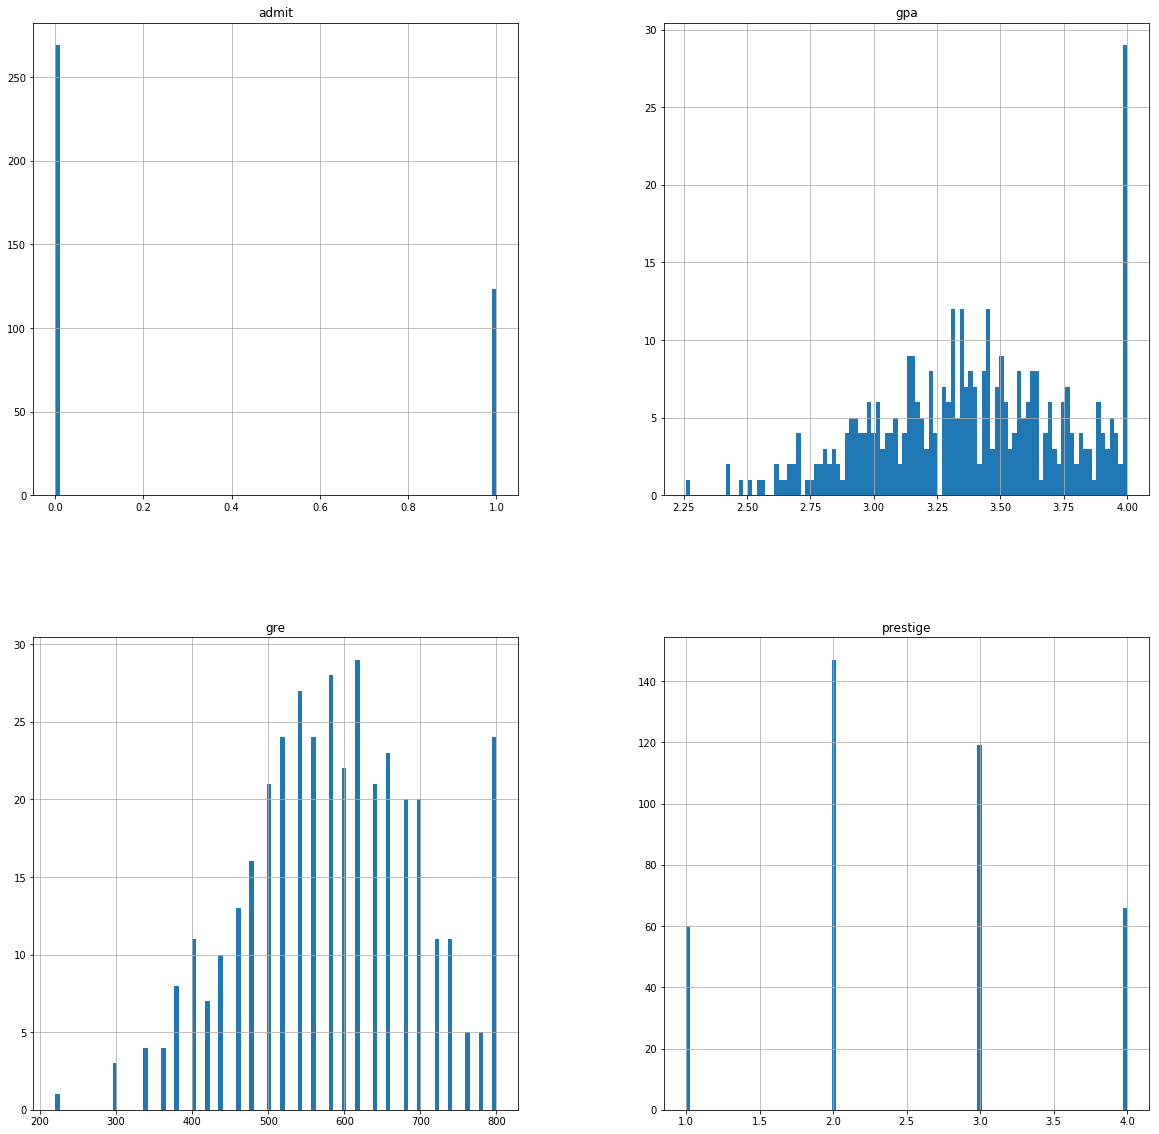

In [19]:
df_clean.hist(figsize = [20,20], bins = 100);

Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

In [20]:
df_clean.describe()

,admit,gre,gpa,prestige
count,392.000000,392.000000,392.000000,392.000000
mean,0.313776,586.632653,3.388520,2.487245
std,0.464619,115.662830,0.377757,0.946033
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,515.000000,3.130000,2.000000
50%,0.000000,580.000000,3.390000,2.000000
75%,1.000000,660.000000,3.662500,3.000000
max,1.000000,800.000000,4.000000,4.000000


In [22]:
stats.skew(df_clean[['gre', 'gpa', 'prestige', 'admit']])

array([-0.13624529, -0.2150128 ,  0.09116343,  0.80264621])

In [23]:
stats.kurtosis(df_clean[['gre', 'gpa', 'prestige', 'admit']])

array([-0.34461754, -0.54565311, -0.90100724, -1.35575906])

Answer: The model doesn’t meet the requirements of normal distribution:
-	GRE, GPA continuous variable, Prestige categorical
-	GRE, GPA, Prestige distributions are not in the form of a bell shape symmetrical and not skewed (mean=median=mode)  

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: GRE and GPA skews are in (-2,2) interval, kurtosis are in (-1,1) interval. These values look ok. However, the model has outliers therefore I would apply a log transformation for GRE and GPA then retest the distribution.  

#### Question 11. Which of our variables are potentially colinear? 

In [24]:
# create a correlation matrix for the data
df_clean.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.174385,0.158862,-0.243981
gre,0.174385,1.000000,0.376021,-0.124507
gpa,0.158862,0.376021,1.000000,-0.052940
prestige,-0.243981,-0.124507,-0.052940,1.000000


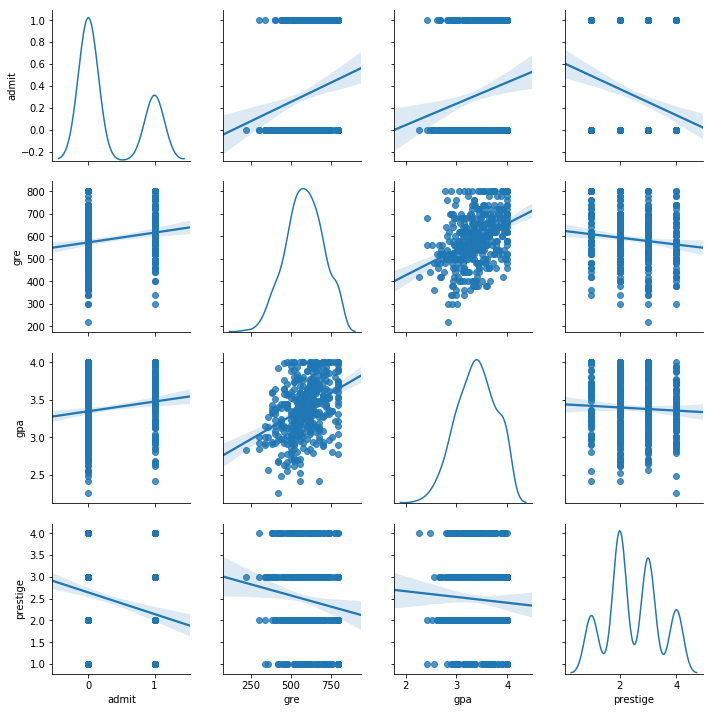

In [25]:
sns.pairplot(df_clean, kind='reg', diag_kind='kde')

#### Question 12. What did you find?

Answer: gre - gpa -> 0.376021   - moderate positive relationship
        gre - prestige  -> - 0.124507 - very week negative realtionship
        gpa - prestige  -> -0.052940  - negligible

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

In [26]:
df_totalnotadmit =df_clean.loc[df_clean['admit'].values==0].groupby('prestige').count()['admit']


In [27]:
df_totaladmit =df_clean.loc[df_clean['admit'].values==1].groupby('prestige').count()['admit']

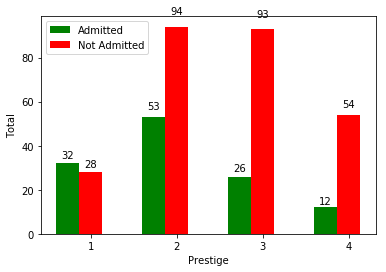

In [28]:
N = 4
ind = np.arange(N) 
width = 0.27       

fig = plt.figure()
ax = fig.add_subplot(111)

yvals = df_totaladmit
rects1 = ax.bar(ind, yvals, width, color='g')
zvals = df_totalnotadmit
rects2 = ax.bar(ind+width, zvals, width, color='r')

ax.set_ylabel('Total')
ax.set_xlabel('Prestige')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('1', '2', '3', '4') )
ax.legend( (rects1[0], rects2[0]), ('Admitted', 'Not Admitted') )

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()


In [29]:
stats.pearsonr(df_clean['prestige'], df_clean['admit'])

(-0.24398120673229842, 1.0122791072846028e-06)

In [30]:
df_clean['admit'].corr(df_clean['prestige'])

-0.2439812067322986

In [32]:
stats.spearmanr(df_clean['prestige'], df_clean['admit'])

SpearmanrResult(correlation=-0.24613562427641938, pvalue=8.065287323758553e-07)

Answer: Correlation coeficient = -0.24 represents a week negative relationship between Admit and Prestige. P-values are greater than 0.05 therefore  there is inconclusive evidence about the significance of the association between the variables.

#### Question 14. What is your hypothesis? 

Answer: Candidates admission is not strongly associated with their prestige rank.  

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data